# Groupby on DataFrames[42]
<h3 style="font-family:Courier;font-size:10px;">Converted for Python3</h3>

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                   'k2':['alpha','beta','alpha','beta','alpha'],
                   'dataset1':np.random.randn(5),
                   'dataset2':np.random.randn(5)})
dframe

,dataset1,dataset2,k1,k2
0,0.443799,0.261326,X,alpha
1,0.789926,0.551315,X,beta
2,0.699831,-0.284216,Y,alpha
3,1.317076,1.130207,Y,beta
4,0.131595,0.491226,Z,alpha


In [3]:
#Create a series group by object
group1 = dframe['dataset1'].groupby(dframe['k1'])
group1

In [4]:
#Perform operations on the group
group1.mean()

k1
X    0.616863
Y    1.008453
Z    0.131595
Name: dataset1, dtype: float64

In [5]:
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

In [6]:
dframe['dataset1'].groupby([cities,month]).mean()

LA  FEB    0.789926
    JAN    0.699831
NY  FEB    1.317076
    JAN    0.287697
Name: dataset1, dtype: float64

In [7]:
dframe

,dataset1,dataset2,k1,k2
0,0.443799,0.261326,X,alpha
1,0.789926,0.551315,X,beta
2,0.699831,-0.284216,Y,alpha
3,1.317076,1.130207,Y,beta
4,0.131595,0.491226,Z,alpha


In [8]:
#pass column names to groupby a column
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,0.616863,0.406320
Y,1.008453,0.422995
Z,0.131595,0.491226


In [9]:
#Get the mean for multiple columns, average for both datasets
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  0.443799  0.261326
   beta   0.789926  0.551315
Y  alpha  0.699831 -0.284216
   beta   1.317076  1.130207
Z  alpha  0.131595  0.491226

In [10]:
#Get sizes
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [11]:
dframe

,dataset1,dataset2,k1,k2
0,0.443799,0.261326,X,alpha
1,0.789926,0.551315,X,beta
2,0.699831,-0.284216,Y,alpha
3,1.317076,1.130207,Y,beta
4,0.131595,0.491226,Z,alpha


In [12]:
#Iterate over groups by a single key
for name,group in dframe.groupby('k1'):
    print "This is the %s group" %name
    print group
    print '\n'

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-12-9ccb0da2cb70>, line 3)

In [17]:
for (k1,k2), group in dframe.groupby(['k1','k2']):
    print("Key1 = %s Key2 %s" %(k1,k2))
    print(group)
    print('\n')

Key1 = X Key2 alpha
   dataset1  dataset2 k1     k2
0  0.443799  0.261326  X  alpha


Key1 = X Key2 beta
   dataset1  dataset2 k1    k2
1  0.789926  0.551315  X  beta


Key1 = Y Key2 alpha
   dataset1  dataset2 k1     k2
2  0.699831 -0.284216  Y  alpha


Key1 = Y Key2 beta
   dataset1  dataset2 k1    k2
3  1.317076  1.130207  Y  beta


Key1 = Z Key2 alpha
   dataset1  dataset2 k1     k2
4  0.131595  0.491226  Z  alpha




In [18]:
#Creating a dictionary of these data points
group_dict = dict(list(dframe.groupby('k1')))

In [19]:
group_dict['X']

,dataset1,dataset2,k1,k2
0,0.443799,0.261326,X,alpha
1,0.789926,0.551315,X,beta


In [20]:
#Create dictionary of d-type objects
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis=1)))

In [21]:
#Separates the dataframe by the data types and puts them in a dictionary
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.443799  0.261326
 1  0.789926  0.551315
 2  0.699831 -0.284216
 3  1.317076  1.130207
 4  0.131595  0.491226, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [22]:
dataset2_group = dframe.groupby(['k1','k2'])[['dataset2']]
dataset2_group.mean()

dataset2
k1 k2             
X  alpha  0.261326
   beta   0.551315
Y  alpha -0.284216
   beta   1.130207
Z  alpha  0.491226

# Groupby on Dict and Series[43]

In [23]:
animals = DataFrame(np.arange(16).reshape(4,4),
                   columns = ['W','X','Y','Z'],
                   index = ['Dog','Cat','Bird','Mouse'])
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [24]:
#add null values
animals.ix[1:2,['W','Y']] = np.nan
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [25]:
#dictionary with behaviour values
behavior_map = {'W':'good','X':'bad','Y':'good','Z':'bad'}
animal_col = animals.groupby(behavior_map,axis=1)
animal_col.sum()

,bad,good
Dog,4.0,2.0
Cat,12.0,NaN
Bird,20.0,18.0
Mouse,28.0,26.0


In [26]:
behav_series = Series(behavior_map)
behav_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [27]:
#groupby the series
animals.groupby(behav_series,axis=1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [28]:
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [29]:
#groupby length of animal names
animals.groupby(len).sum()

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [30]:
keys = ['A','B','A','B']
animals.groupby([len,keys]).max()

W   X     Y   Z
3 A   0.0   1   2.0   3
  B   NaN   5   NaN   7
4 A   8.0   9  10.0  11
5 B  12.0  13  14.0  15

In [31]:
hier_col = pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],[1,2,3,1,2]],
                                     names = ['City','sub_value'])

In [32]:
dframe_hr = DataFrame(np.arange(25).reshape(5,5),columns=hier_col)

In [33]:
drame_hr = dframe_hr * 100
drame_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

# Aggregation[44]
## Operations that result in a scalar

url = 'http://archive.ics.edu/ml/machine-learning-databases/wine-quality/'

In [34]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
#Find the average alhohol content
dframe_wine['alcohol'].mean()

10.422983114446502

In [36]:
#check out the entire data set
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [37]:
#Make our own data aggregation
def max_to_min(arr):
    return arr.max() - arr.min()

In [38]:
#Implement this function using groupby to create a new data set
wino = dframe_wine.groupby('quality')
wino.describe()

alcohol   chlorides  citric acid     density  fixed acidity  \
quality                                                                         
3       count   10.000000   10.000000    10.000000   10.000000      10.000000   
        mean     9.955000    0.122500     0.171000    0.997464       8.360000   
        std      0.818009    0.066241     0.250664    0.002002       1.770875   
        min      8.400000    0.061000     0.000000    0.994710       6.700000   
        25%      9.725000    0.079000     0.005000    0.996150       7.150000   
        50%      9.925000    0.090500     0.035000    0.997565       7.500000   
        75%     10.575000    0.143000     0.327500    0.998770       9.875000   
        max     11.000000    0.267000     0.660000    1.000800      11.600000   
4       count   53.000000   53.000000    53.000000   53.000000      53.000000   
        mean    10.265094    0.090679     0.174151    0.996542       7.779245   
        std      0.934776    0.076192     0.201030    0.001575       1.626624   
        min      9.000000    0.045000     0.000000    0.993400       4.600000   
        25%      9.600000    0.067000     0.030000    0.995650       6.800000   
        50%     10.000000    0.080000     0.090000    0.996500       7.500000   
        75%     11.000000    0.089000     0.270000    0.997450       8.400000   
        max     13.100000    0.610000     1.000000    1.001000      12.500000   
5       count  681.000000  681.000000   681.000000  681.000000     681.000000   
        mean     9.899706    0.092736     0.243686    0.997104       8.167254   
        std      0.736521    0.053707     0.180003    0.001589       1.563988   
        min      8.500000    0.039000     0.000000    0.992560       5.000000   
        25%      9.400000    0.074000     0.090000    0.996200       7.100000   
        50%      9.700000    0.081000     0.230000    0.997000       7.800000   
        75%     10.200000    0.094000     0.360000    0.997900       8.900000   
        max     14.900000    0.611000     0.790000    1.003150      15.900000   
6       count  638.000000  638.000000   638.000000  638.000000     638.000000   
        mean    10.629519    0.084956     0.273824    0.996615       8.347179   
        std      1.049639    0.039563     0.195108    0.002000       1.797849   
        min      8.400000    0.034000     0.000000    0.990070       4.700000   
        25%      9.800000    0.068250     0.090000    0.995402       7.000000   
        50%     10.500000    0.078000     0.260000    0.996560       7.900000   
        75%     11.300000    0.088000     0.430000    0.997893       9.400000   
        max     14.000000    0.415000     0.780000    1.003690      14.300000   
7       count  199.000000  199.000000   199.000000  199.000000     199.000000   
        mean    11.465913    0.076588     0.375176    0.996104       8.872362   
        std      0.961933    0.029456     0.194432    0.002176       1.992483   
        min      9.200000    0.012000     0.000000    0.990640       4.900000   
        25%     10.800000    0.062000     0.305000    0.994765       7.400000   
        50%     11.500000    0.073000     0.400000    0.995770       8.800000   
        75%     12.100000    0.087000     0.490000    0.997360      10.100000   
        max     14.000000    0.358000     0.760000    1.003200      15.600000   
8       count   18.000000   18.000000    18.000000   18.000000      18.000000   
        mean    12.094444    0.068444     0.391111    0.995212       8.566667   
        std      1.224011    0.011678     0.199526    0.002378       2.119656   
        min      9.800000    0.044000     0.030000    0.990800       5.000000   
        25%     11.325000    0.062000     0.302500    0.994175       7.250000   
        50%     12.150000    0.070500     0.420000    0.994940       8.250000   
        75%     12.875000    0.075500     0.530000    0.997200      10.225000   
        max     14.000000    0.086000     0.72000

In [39]:
#Pass a general aggregation function,will go from minimum to maximum
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [40]:
#Pass string functions
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [41]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
#Add a quality to alcohol content ratio, new column
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

In [43]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [44]:
#Use pivot tables instead of groupby to achieve the same effect
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [45]:
import matplotlib
%matplotlib inline

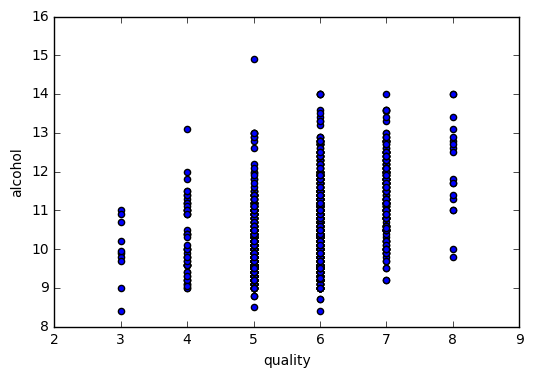

In [46]:
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

{'boxes': [<matplotlib.lines.Line2D at 0x1d7ba948cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7ba9597b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d7ba95ef60>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1d7ba95e198>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1d7ba948f98>,
  <matplotlib.lines.Line2D at 0x1d7ba96a8d0>]}

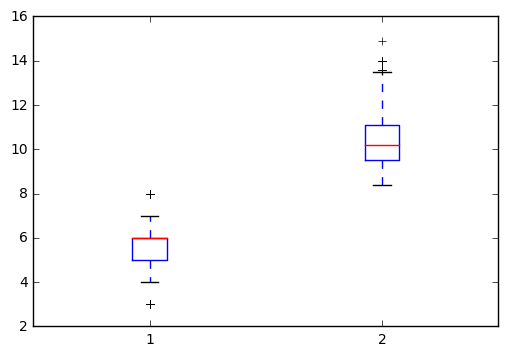

In [47]:
#Data may be better fit for a boxplot
import matplotlib.pyplot as plt
wine_data = dframe_wine['quality']
alc_data = dframe_wine['alcohol']
data = [wine_data,alc_data]
plt.boxplot(data)

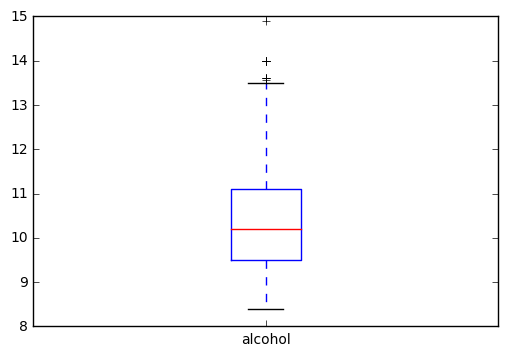

In [48]:
dframe_wine.plot(kind='box',x='quality',y='alcohol')

# Split, Apply, Combine[45]

## Split: split up by an index
## Apply: apply a transformation
## Combine: re-merge after transformations

In [49]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [50]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
#Assign a rank based on alcohol content
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [52]:
#Assort dataframe by alcohol in ascending order
dframe_wine.sort('alcohol',ascending =False,inplace=True)

C:\Users\JamesDillon\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [53]:
#Split, apply, combine
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [54]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,3


In [55]:
#We are now closer to finding the highest alc content for each ranking
#value counts is a built in method
num_of_qual = dframe_wine['quality'].value_counts()

In [56]:
#number of wines in each quality count
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [57]:
dframe_wine[dframe_wine.alc_content_rank == 1].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1


In [58]:
#Are there any trends between the ranking of wine, and alcohol content?

# Cross Tabulation[46]
## Special case pivot tables

In [61]:
#from StringIO import StringIO #deprecated from python2.7
from io import StringIO
data="""\
sample Animal Intelligence
1 Dog Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""
dframe = pd.read_table(StringIO(data),sep='\s+')
dframe

,sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [62]:
#Create a cross tabulation/frequency table
pd.crosstab(dframe.Animal,dframe.Intelligence,margins=True)
#Create a pivot table that is essentially a frequency counter, will add an 'All' row

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
